In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
from keras.layers import Dense, Activation
from keras.models import Sequential
import keras

Using TensorFlow backend.


In [2]:
Out = pd.read_excel('Data_Folder/4_12_outsided_wearable.xlsx',header=0,index_col=0)
In = pd.read_excel('Data_Folder/Demo4_20/4_20_wearable_inside.xlsx',header=0,index_col=0)

In [3]:
In = In.resample('1T',on='#VALUE!').mean()
Out = Out.fillna(method='ffill')
In = In.fillna(method='ffill')
Out = Out.resample('1T',on='time').mean()
Out.drop(columns=['Time(s)'], inplace=True)
In.drop(columns=['Time(s)'], inplace=True)
Out.index = range(Out.shape[0])
In.index = range(In.shape[0])
In = In.iloc[:500,:]

In [4]:
In_label = np.ones((In.shape[0],), dtype=int)
Out_label = np.zeros((Out.shape[0],), dtype=int)
In['label'] = In_label
Out['label'] = Out_label

In [5]:
DF = pd.concat([In,Out],axis=0)
DF = shuffle(DF)

### SVC, NuSVC, LinearSVC

In [6]:
X_train, X_test, y_train, y_test = train_test_split(DF.iloc[:,:6], DF.iloc[:,6:], test_size = 0.2, random_state = 0)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  


[[191   0]
 [  0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       109

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [8]:
classifier2 = svm.SVC(kernel='poly',degree=2)
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[191   0]
 [  0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       109

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
"""the result is not good as the previous two"""
classifier3 = svm.SVC(kernel='rbf')
classifier3.fit(X_train,y_train)
y_pred = classifier3.predict(X_test)

#print(confusion_matrix(y_test,y_pred))  
#print(classification_report(y_test,y_pred))  

In [10]:
'''the result is not good as the previous two'''
classifier4 = svm.SVC(kernel='sigmoid')
classifier4.fit(X_train,y_train)
y_pred = classifier4.predict(X_test)

#print(confusion_matrix(y_test,y_pred))  
#print(classification_report(y_test,y_pred))

In [11]:
mixed = pd.read_csv('Data_Folder/Demo3_5/Wearable_label.csv')
mixed.dropna(inplace=True)
mixed = shuffle(mixed)
mixed.drop(columns=['time'],inplace=True)

In [12]:
y_pred = classifier.predict(mixed.iloc[:,:6])
y_test_mixed = mixed.iloc[:,6:]
print(confusion_matrix(y_test_mixed,y_pred))  
print(classification_report(y_test_mixed,y_pred))  

[[ 6  5]
 [15 29]]
              precision    recall  f1-score   support

         0.0       0.29      0.55      0.37        11
         1.0       0.85      0.66      0.74        44

   micro avg       0.64      0.64      0.64        55
   macro avg       0.57      0.60      0.56        55
weighted avg       0.74      0.64      0.67        55



In [13]:
y_pred = classifier2.predict(mixed.iloc[:,:6])
y_test_mixed = mixed.iloc[:,6:]
print(confusion_matrix(y_test_mixed,y_pred))  
print(classification_report(y_test_mixed,y_pred))  

[[ 6  5]
 [27 17]]
              precision    recall  f1-score   support

         0.0       0.18      0.55      0.27        11
         1.0       0.77      0.39      0.52        44

   micro avg       0.42      0.42      0.42        55
   macro avg       0.48      0.47      0.39        55
weighted avg       0.65      0.42      0.47        55



In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [26]:
y_test

,label
987,0
903,0
469,0
649,0
932,0
449,1
569,0
785,0
374,0
245,1


### deep learning

In [20]:
model = Sequential()
model.add(Dense(60, input_dim=6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 10, epochs = 50)
scores = model.evaluate(X_test,y_test,batch_size = 10)

Train on 1199 samples, validate on 300 samples
Epoch 1/50
1199/1199 [==============================] - 0s 344us/step - loss: 1.7115 - acc: 0.8916 - val_loss: 0.5755 - val_acc: 0.9633
Epoch 2/50
1199/1199 [==============================] - 0s 145us/step - loss: 0.6327 - acc: 0.9550 - val_loss: 0.4252 - val_acc: 0.9733
Epoch 3/50
1199/1199 [==============================] - 0s 143us/step - loss: 0.9778 - acc: 0.9366 - val_loss: 0.4251 - val_acc: 0.9733
Epoch 4/50
1199/1199 [==============================] - 0s 155us/step - loss: 1.1304 - acc: 0.9291 - val_loss: 1.2754 - val_acc: 0.9200
Epoch 5/50
1199/1199 [==============================] - 0s 154us/step - loss: 1.7019 - acc: 0.8932 - val_loss: 1.2754 - val_acc: 0.9200
Epoch 6/50
1199/1199 [==============================] - 0s 151us/step - loss: 1.7019 - acc: 0.8932 - val_loss: 1.2754 - val_acc: 0.9200
Epoch 7/50
1199/1199 [==============================] - 0s 152us/step - loss: 1.7019 - acc: 0.8932 - val_loss: 1.2754 - val_acc: 0.9200
E

In [21]:
scores

[1.2753908815616921, 0.9199999928474426]

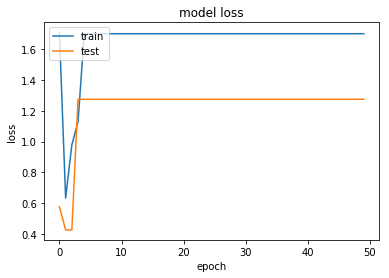

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

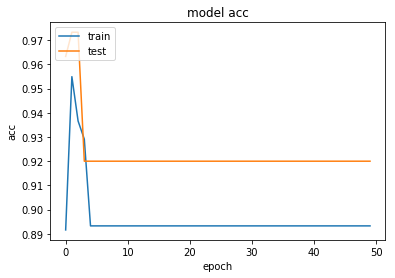

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
scores = model.evaluate(mixed.iloc[:,:6],mixed.iloc[:,6:])
scores

55/55 [==============================] - 0s 107us/step


[4.089439262043346, 0.7272727370262146]